In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r'E:\TimeSeriesData\Data.csv',encoding='latin-1')

variable ie order id and Sales of furniture are of interest

In [3]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


In [4]:
df_furniture=df[df['Category']=='Furniture']

In [6]:
df['Category'].value_counts()

Furniture    2121
Name: Category, dtype: int64

In [7]:
Yt_data=df[['Order Date','Sales']]

In [8]:
Yt_data.shape

(2121, 2)

In [9]:
Yt_data.head(10)

,Order Date,Sales
0,11-08-2016,261.9600
1,11-08-2016,731.9400
2,10-11-2015,957.5775
3,06-09-2014,48.8600
4,06-09-2014,1706.1840
5,7/16/2017,71.3720
6,9/25/2015,1044.6300
7,9/17/2015,3083.4300
8,9/17/2015,124.2000
9,12-08-2016,190.9200


In [10]:
Yt_data.dtypes

Order Date     object
Sales         float64
dtype: object

In [11]:
Yt_data['order_date']=pd.to_datetime(Yt_data['Order Date'])

C:\Users\sony\AppData\Local\Temp\ipykernel_8472\3798879652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Yt_data['order_date']=pd.to_datetime(Yt_data['Order Date'])


In [12]:
Yt_data.dtypes

Order Date            object
Sales                float64
order_date    datetime64[ns]
dtype: object

In [13]:
Yt_data.drop(columns=['Order Date'],inplace=True)

C:\Users\sony\AppData\Local\Temp\ipykernel_8472\3144707936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Yt_data.drop(columns=['Order Date'],inplace=True)


In [14]:
Yt_data.isnull().sum()

Sales         0
order_date    0
dtype: int64

NO repeatation of Date is allowed therefore doing following coding

In [15]:
Yt_data1=Yt_data.groupby('order_date')['Sales'].sum().reset_index()

In [16]:
Yt_data.head(2)

,Sales,order_date
0,261.96,2016-11-08
1,731.94,2016-11-08


In [17]:
Yt_data1.head(2)

,order_date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728


In [18]:
Yt_data1.sort_values(by='order_date',inplace=True)

In [19]:
Yt_data1.shape

(889, 2)

In [20]:
Yt_data1.max()

order_date    2017-12-30 00:00:00
Sales                   10006.174
dtype: object

In [21]:
Yt_data1.min()

order_date    2014-01-06 00:00:00
Sales                       1.988
dtype: object

In [21]:
4*365

1460

In [22]:
1460-889

571

In [24]:
Yt_data1

,order_date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


since there are missing sales Dates therefore we would fill it by taking average of weekly sales or monthly sales and then filling the misssing values 
* for Stock market data we will take weekly average

In [25]:
Yt_data1.set_index(['order_date'],inplace=True)

In [26]:
Yt_data1.dtypes

Sales    float64
dtype: object

In [27]:
Yt_data2= Yt_data1['Sales'].resample('MS').mean()

In [28]:
Yt_data2.shape

(48,)

### Model Develoment

#### Visualization

<AxesSubplot:xlabel='order_date'>

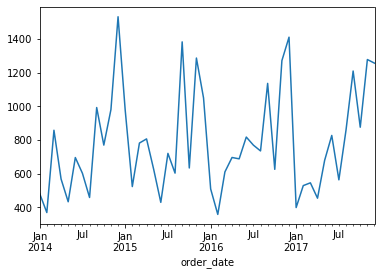

In [29]:
Yt_data2.plot()

In [30]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='order_date'>

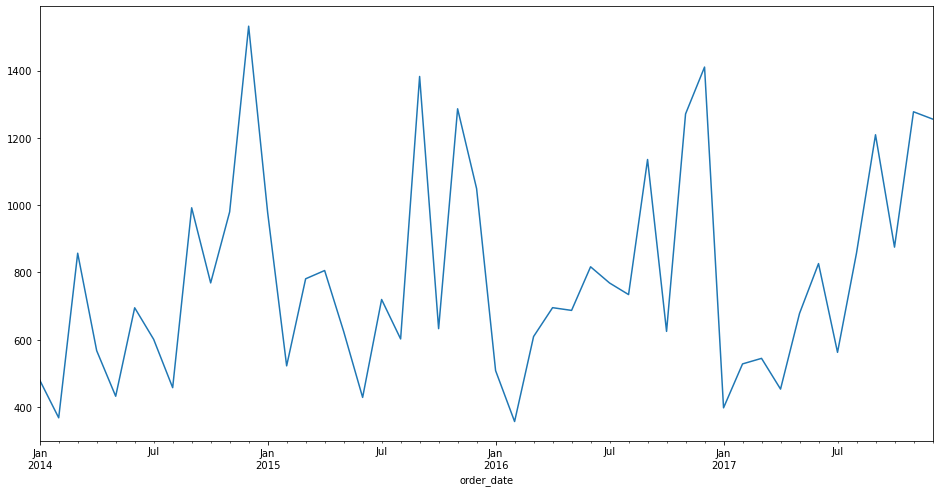

In [31]:
plt.figure(figsize=(16,8))
Yt_data2.plot()

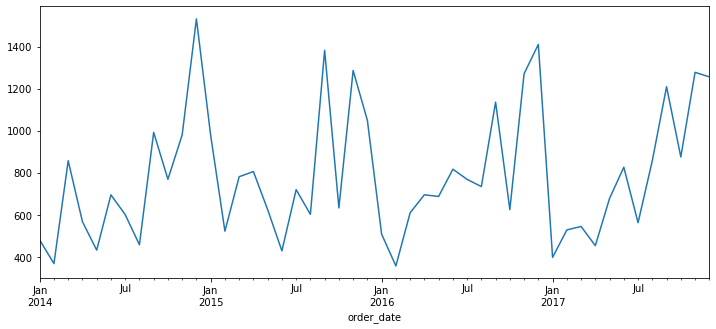

In [32]:
import matplotlib.pyplot as plt
Yt_data2.plot(figsize=(12,5))

from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(Yt_data2, model ='multiplicative',two_sided=False,extrapolate_trend=4)

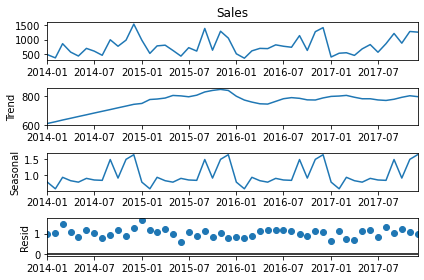

In [33]:
decompose.plot()
plt.show()

In [34]:
# decompose.resid

In [35]:
# decompose.trend

In [36]:
# decompose.seasonal

In [37]:
0.785191*609.910729*1.002710 # Actual=SI*Trend*It

480.1942244994695

In [38]:
pd.DataFrame({'Actual':decompose.observed,'SI':decompose.seasonal,
             'Trend':decompose.trend,'It':decompose.resid})

,Actual,SI,Trend,It
order_date,,,,
2014-01-01,480.194231,0.785191,609.910729,1.002710
2014-02-01,367.931600,0.580535,621.951672,1.019019
2014-03-01,857.291529,0.932805,633.992615,1.449618
2014-04-01,567.488357,0.828757,646.033558,1.059923
2014-05-01,432.049188,0.784427,658.074501,0.836962
2014-06-01,695.059242,0.899964,670.115444,1.152516
2014-07-01,601.169500,0.850767,682.156387,1.035863
2014-08-01,457.521656,0.839583,694.197330,0.784992
2014-09-01,992.353367,1.478321,706.238273,0.950487


for temporal data we can't take random values of split

In [39]:
train=Yt_data2['2014-01-01':'2017-06-01']
test=Yt_data2['2017-06-01':]

#### ETS:

In [40]:
# our guessed parametes
from statsmodels.tsa.holtwinters import ExponentialSmoothing
alpha=0.6
beta=0.2
gamma=0.4

ets_model=ExponentialSmoothing(train,trend='mul',seasonal_periods=12)


ets_fit=ets_model.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma)

C:\Users\sony\AppData\Local\Temp\ipykernel_8472\3357053358.py:10: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma)


In [41]:
pred_y=ets_fit.forecast(6)

In [42]:
pred_y

2017-07-01    755.745542
2017-08-01    783.020986
2017-09-01    811.280823
2017-10-01    840.560580
2017-11-01    870.897065
2017-12-01    902.328418
Freq: MS, dtype: float64

In [43]:
test

order_date
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

In [44]:
print('Test MAE',np.mean(abs((test-pred_y))/test)) # 2nd iteration with differnt values of beta

Test MAE 0.2333269785795472


In [45]:
print('Test MAE',np.mean(abs((test-pred_y))/test)) # 1st iteration 

Test MAE 0.2333269785795472


### loop for selecting best alpha,beta and gamma to get optimal MAE for ETS method

In [46]:
alpha=np.linspace(0,.99,5)
beta=np.linspace(0,.99,5)
gamma=[0.01,.4,.3,.23]

min_mae=987654321987654

al1=0
bet1=0
gam1=0

for a in alpha:
    for b in beta:
        for g in gamma:
            ets_model=ExponentialSmoothing(train,trend='mul',seasonal_periods=12)
            ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)  
            pred_y=ets_fit.forecast(6)
            mae=np.mean(abs(test-pred_y)/test)
            print(f'MAE={mae} for alpha={a},beta={b},gamm={g}')
            if min_mae>mae:
                min_mae=mae
                al1=a
                bet1=b
                gam1=g
mypara={'alpha':al1,'beta':bet1,'gamma':gam1}

C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_mo

MAE=10.486325993586986 for alpha=0.0,beta=0.0,gamm=0.01
MAE=10.486325993586986 for alpha=0.0,beta=0.0,gamm=0.4
MAE=10.486325993586986 for alpha=0.0,beta=0.0,gamm=0.3
MAE=10.486325993586986 for alpha=0.0,beta=0.0,gamm=0.23
MAE=10.486325993586986 for alpha=0.0,beta=0.2475,gamm=0.01
MAE=10.486325993586986 for alpha=0.0,beta=0.2475,gamm=0.4
MAE=10.486325993586986 for alpha=0.0,beta=0.2475,gamm=0.3
MAE=10.486325993586986 for alpha=0.0,beta=0.2475,gamm=0.23
MAE=10.486325993586986 for alpha=0.0,beta=0.495,gamm=0.01
MAE=10.486325993586986 for alpha=0.0,beta=0.495,gamm=0.4
MAE=10.486325993586986 for alpha=0.0,beta=0.495,gamm=0.3
MAE=10.486325993586986 for alpha=0.0,beta=0.495,gamm=0.23
MAE=10.486325993586986 for alpha=0.0,beta=0.7424999999999999,gamm=0.01
MAE=10.486325993586986 for alpha=0.0,beta=0.7424999999999999,gamm=0.4
MAE=10.486325993586986 for alpha=0.0,beta=0.7424999999999999,gamm=0.3
MAE=10.486325993586986 for alpha=0.0,beta=0.7424999999999999,gamm=0.23


C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_mo

MAE=10.486325993586986 for alpha=0.0,beta=0.99,gamm=0.01
MAE=10.486325993586986 for alpha=0.0,beta=0.99,gamm=0.4
MAE=10.486325993586986 for alpha=0.0,beta=0.99,gamm=0.3
MAE=10.486325993586986 for alpha=0.0,beta=0.99,gamm=0.23
MAE=0.26393109935534925 for alpha=0.2475,beta=0.0,gamm=0.01
MAE=0.26393109935534925 for alpha=0.2475,beta=0.0,gamm=0.4
MAE=0.26393109935534925 for alpha=0.2475,beta=0.0,gamm=0.3
MAE=0.26393109935534925 for alpha=0.2475,beta=0.0,gamm=0.23
MAE=0.37230854090608784 for alpha=0.2475,beta=0.2475,gamm=0.01
MAE=0.37230854090608784 for alpha=0.2475,beta=0.2475,gamm=0.4
MAE=0.37230854090608784 for alpha=0.2475,beta=0.2475,gamm=0.3
MAE=0.37230854090608784 for alpha=0.2475,beta=0.2475,gamm=0.23
MAE=0.4518079625238817 for alpha=0.2475,beta=0.495,gamm=0.01


C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,

MAE=0.4518079625238817 for alpha=0.2475,beta=0.495,gamm=0.4
MAE=0.4518079625238817 for alpha=0.2475,beta=0.495,gamm=0.3
MAE=0.4518079625238817 for alpha=0.2475,beta=0.495,gamm=0.23
MAE=0.5019145269296117 for alpha=0.2475,beta=0.7424999999999999,gamm=0.01
MAE=0.5019145269296117 for alpha=0.2475,beta=0.7424999999999999,gamm=0.4
MAE=0.5019145269296117 for alpha=0.2475,beta=0.7424999999999999,gamm=0.3
MAE=0.5019145269296117 for alpha=0.2475,beta=0.7424999999999999,gamm=0.23
MAE=0.3936962701696259 for alpha=0.2475,beta=0.99,gamm=0.01
MAE=0.3936962701696259 for alpha=0.2475,beta=0.99,gamm=0.4
MAE=0.3936962701696259 for alpha=0.2475,beta=0.99,gamm=0.3
MAE=0.3936962701696259 for alpha=0.2475,beta=0.99,gamm=0.23
MAE=0.18024701566595527 for alpha=0.495,beta=0.0,gamm=0.01
MAE=0.18024701566595527 for alpha=0.495,beta=0.0,gamm=0.4
MAE=0.18024701566595527 for alpha=0.495,beta=0.0,gamm=0.3
MAE=0.18024701566595527 for alpha=0.495,beta=0.0,gamm=0.23
MAE=0.29671307521432827 for alpha=0.495,beta=0.2475,g

C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
C:\Users\sony\AppData\Local\Temp\ipykern

MAE=0.29671307521432827 for alpha=0.495,beta=0.2475,gamm=0.3
MAE=0.29671307521432827 for alpha=0.495,beta=0.2475,gamm=0.23
MAE=0.14806293320428326 for alpha=0.495,beta=0.495,gamm=0.01
MAE=0.14806293320428326 for alpha=0.495,beta=0.495,gamm=0.4
MAE=0.14806293320428326 for alpha=0.495,beta=0.495,gamm=0.3
MAE=0.14806293320428326 for alpha=0.495,beta=0.495,gamm=0.23
MAE=0.7521502658865872 for alpha=0.495,beta=0.7424999999999999,gamm=0.01
MAE=0.7521502658865872 for alpha=0.495,beta=0.7424999999999999,gamm=0.4
MAE=0.7521502658865872 for alpha=0.495,beta=0.7424999999999999,gamm=0.3
MAE=0.7521502658865872 for alpha=0.495,beta=0.7424999999999999,gamm=0.23
MAE=1.8781956980639245 for alpha=0.495,beta=0.99,gamm=0.01
MAE=1.8781956980639245 for alpha=0.495,beta=0.99,gamm=0.4
MAE=1.8781956980639245 for alpha=0.495,beta=0.99,gamm=0.3
MAE=1.8781956980639245 for alpha=0.495,beta=0.99,gamm=0.23


C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
C:\Users\sony\AppData\Local\Temp\ipykern

MAE=0.18645835027947566 for alpha=0.7424999999999999,beta=0.0,gamm=0.01
MAE=0.18645835027947566 for alpha=0.7424999999999999,beta=0.0,gamm=0.4
MAE=0.18645835027947566 for alpha=0.7424999999999999,beta=0.0,gamm=0.3
MAE=0.18645835027947566 for alpha=0.7424999999999999,beta=0.0,gamm=0.23
MAE=0.1771998812304814 for alpha=0.7424999999999999,beta=0.2475,gamm=0.01
MAE=0.1771998812304814 for alpha=0.7424999999999999,beta=0.2475,gamm=0.4
MAE=0.1771998812304814 for alpha=0.7424999999999999,beta=0.2475,gamm=0.3
MAE=0.1771998812304814 for alpha=0.7424999999999999,beta=0.2475,gamm=0.23
MAE=0.5514529179203501 for alpha=0.7424999999999999,beta=0.495,gamm=0.01
MAE=0.5514529179203501 for alpha=0.7424999999999999,beta=0.495,gamm=0.4
MAE=0.5514529179203501 for alpha=0.7424999999999999,beta=0.495,gamm=0.3
MAE=0.5514529179203501 for alpha=0.7424999999999999,beta=0.495,gamm=0.23
MAE=1.1819870070403573 for alpha=0.7424999999999999,beta=0.7424999999999999,gamm=0.01
MAE=1.1819870070403573 for alpha=0.742499999

C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
C:\Users\sony\AppData\Local\Temp\ipykern

MAE=1.1819870070403573 for alpha=0.7424999999999999,beta=0.7424999999999999,gamm=0.23
MAE=1.5109158581179603 for alpha=0.7424999999999999,beta=0.99,gamm=0.01
MAE=1.5109158581179603 for alpha=0.7424999999999999,beta=0.99,gamm=0.4
MAE=1.5109158581179603 for alpha=0.7424999999999999,beta=0.99,gamm=0.3
MAE=1.5109158581179603 for alpha=0.7424999999999999,beta=0.99,gamm=0.23
MAE=0.44826388106500087 for alpha=0.99,beta=0.0,gamm=0.01
MAE=0.44826388106500087 for alpha=0.99,beta=0.0,gamm=0.4
MAE=0.44826388106500087 for alpha=0.99,beta=0.0,gamm=0.3
MAE=0.44826388106500087 for alpha=0.99,beta=0.0,gamm=0.23
MAE=0.3986754123613945 for alpha=0.99,beta=0.2475,gamm=0.01
MAE=0.3986754123613945 for alpha=0.99,beta=0.2475,gamm=0.4
MAE=0.3986754123613945 for alpha=0.99,beta=0.2475,gamm=0.3
MAE=0.3986754123613945 for alpha=0.99,beta=0.2475,gamm=0.23
MAE=0.7226767345168509 for alpha=0.99,beta=0.495,gamm=0.01


C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
C:\Users\sony\AppData\Local\Temp\ipykern

MAE=0.7226767345168509 for alpha=0.99,beta=0.495,gamm=0.4
MAE=0.7226767345168509 for alpha=0.99,beta=0.495,gamm=0.3
MAE=0.7226767345168509 for alpha=0.99,beta=0.495,gamm=0.23
MAE=0.9260215417987542 for alpha=0.99,beta=0.7424999999999999,gamm=0.01
MAE=0.9260215417987542 for alpha=0.99,beta=0.7424999999999999,gamm=0.4
MAE=0.9260215417987542 for alpha=0.99,beta=0.7424999999999999,gamm=0.3
MAE=0.9260215417987542 for alpha=0.99,beta=0.7424999999999999,gamm=0.23
MAE=0.7971719009505766 for alpha=0.99,beta=0.99,gamm=0.01
MAE=0.7971719009505766 for alpha=0.99,beta=0.99,gamm=0.4
MAE=0.7971719009505766 for alpha=0.99,beta=0.99,gamm=0.3
MAE=0.7971719009505766 for alpha=0.99,beta=0.99,gamm=0.23


C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)
C:\Users\sony\AppData\Local\Temp\ipykernel_8472\2542097125.py:15: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=a,smoothing_slope=b,smoothing_seasonal=g)


In [47]:
min_mae

0.14806293320428326

In [48]:
al1

0.495

In [49]:
bet1

0.495

In [50]:
gam1

0.01

In [51]:
mypara

{'alpha': 0.495, 'beta': 0.495, 'gamma': 0.01}

In [52]:
# our guessed parametes
from statsmodels.tsa.holtwinters import ExponentialSmoothing
alpha=0.2475
beta=0
gamma=0.23

ets_model=ExponentialSmoothing(Yt_data2,trend='mul',seasonal="mul",seasonal_periods=12)


ets_fit=ets_model.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma)

C:\Users\sony\AppData\Local\Temp\ipykernel_8472\3595548207.py:10: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_fit=ets_model.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma)


In [53]:
# Forecast for next 6 month
ets_fit.forecast(6)

2018-01-01    659.209770
2018-02-01    525.011352
2018-03-01    755.425492
2018-04-01    722.843300
2018-05-01    756.146048
2018-06-01    839.886239
Freq: MS, dtype: float64

<AxesSubplot:>

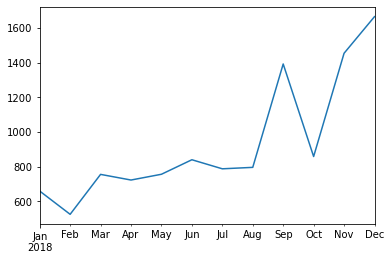

In [54]:
ets_fit.forecast(12).plot()

<AxesSubplot:xlabel='order_date'>

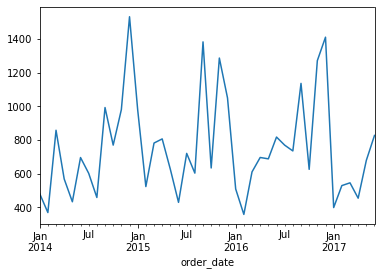

In [55]:
train.plot()

### ARIMA

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Null-Series is not stationery
# Alternate-Series is stationery

#### as my series is stationery with any diff so my d would be 0

In [ ]:
plt.subplot(12,)

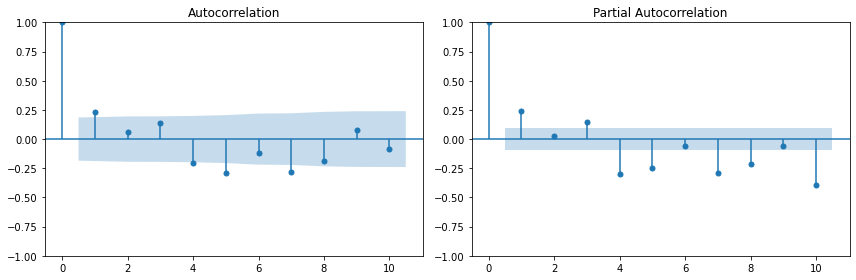

In [62]:
import statsmodels.tsa.api as smt
fig,axes=plt.subplots(1,2,sharey=False,sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(Yt_data2,lags=10,ax=axes[0],alpha=0.2)
smt.graphics.plot_pacf(Yt_data2,lags=10,ax=axes[1],alpha=0.5,method='ols')
plt.tight_layout()

In [ ]:
# p=3,q=3,d=0
# P,D,Q,period,
# in general , P=p,D=0,Q=q,period=12

In [68]:
import statsmodels.api as sm
# here in function order=(p,d,q)
# seasonal_order=(P,D,Q,period)

model=sm.tsa.statespace.SARIMAX(train,order=(3,0,1),seasonal_order=(1,0,1,12),
                                                   enforce_stationarity=False,
                                                   enforce_invertibility=False).fit()

In [72]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   42
Model:             SARIMAX(3, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -183.848
Date:                            Mon, 21 Nov 2022   AIC                            381.697
Time:                                    10:20:55   BIC                            390.768
Sample:                                01-01-2014   HQIC                           384.394
                                     - 06-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0238      1.696     -0.014      0.989      -3.348       3.301
ar.L2          0.0817      0.323   

In [69]:
forecasterima=model.forecast(6)
forecasterima

2017-07-01     730.153448
2017-08-01     650.207879
2017-09-01    1176.701371
2017-10-01     652.081142
2017-11-01    1210.042494
2017-12-01    1321.302417
Freq: MS, Name: predicted_mean, dtype: float64

In [70]:
test

order_date
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

In [71]:
print('MAE',np.mean(abs(test-forecasterima)/test))

MAE 0.15450843197769967


In [73]:
# For calculating combination of different values of variable
import itertools

In [76]:
p=[0,1,2]
d=[0,1]
list(itertools.product(p,d))

[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]

In [77]:
for i in list(itertools.product(p,d)):
    print(i)

(0, 0)
(0, 1)
(1, 0)
(1, 1)
(2, 0)
(2, 1)


In [88]:
4*2*4*3*1*3

288

In [95]:
# Generate all different combinations of p,d and q triplets
p=[0,1,2,3]
d=[0,1]
q=[0,1,2,3]
P=[0,1,2]
D=[0]
Q=[0,1,2]

pdq = list(itertools.product(p,d,q))
# Generate all different combination of seasonal p,d and q triplets
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(P,D,Q))]

count=0

best_pdq = None
best_seasonal_sdq = None
best_results = 1651189484316518

for i in pdq:
    for j in seasonal_pdq:
        model1 = sm.tsa.statespace.SARIMAX(train,order=i,seasonal_order=j,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False).fit()
        ftest=model1.forecast(6)
        mae=np.mean(abs(test-ftest)/test)
        print(f'Completed for {count}/288 MAE={mae},pdq={i},seasonal PDQ={j}')
        if best_results > mae :
            best_results=mae
            best_pdq=i
            best_seasonal_pdq=j

Completed for 0/288 MAE=1.0,pdq=(0, 0, 0),seasonal PDQ=(0, 0, 0, 12)
Completed for 0/288 MAE=0.9999999999999982,pdq=(0, 0, 0),seasonal PDQ=(0, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.38547189184838326,pdq=(0, 0, 0),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.16776890082509155,pdq=(0, 0, 0),seasonal PDQ=(1, 0, 0, 12)
Completed for 0/288 MAE=0.15442725705171254,pdq=(0, 0, 0),seasonal PDQ=(1, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.16876193429186595,pdq=(0, 0, 0),seasonal PDQ=(1, 0, 2, 12)
Completed for 0/288 MAE=0.14217933481760853,pdq=(0, 0, 0),seasonal PDQ=(2, 0, 0, 12)
Completed for 0/288 MAE=0.15829190683106023,pdq=(0, 0, 0),seasonal PDQ=(2, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.16282534731433143,pdq=(0, 0, 0),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.8952122087369405,pdq=(0, 0, 1),seasonal PDQ=(0, 0, 0, 12)
Completed for 0/288 MAE=0.9999999999999969,pdq=(0, 0, 1),seasonal PDQ=(0, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.41522414385992024,pdq=(0, 0, 1),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.16952031391211067,pdq=(0, 0, 1),seasonal PDQ=(1, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.17459718477374594,pdq=(0, 0, 1),seasonal PDQ=(1, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.18623884841737284,pdq=(0, 0, 1),seasonal PDQ=(1, 0, 2, 12)
Completed for 0/288 MAE=0.15348590976458656,pdq=(0, 0, 1),seasonal PDQ=(2, 0, 0, 12)
Completed for 0/288 MAE=0.16109125029610064,pdq=(0, 0, 1),seasonal PDQ=(2, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.17354300395733813,pdq=(0, 0, 1),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.8364179379156239,pdq=(0, 0, 2),seasonal PDQ=(0, 0, 0, 12)
Completed for 0/288 MAE=48539362.946339756,pdq=(0, 0, 2),seasonal PDQ=(0, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.4243756173566078,pdq=(0, 0, 2),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.17358436280035425,pdq=(0, 0, 2),seasonal PDQ=(1, 0, 0, 12)
Completed for 0/288 MAE=0.16442854413288485,pdq=(0, 0, 2),seasonal PDQ=(1, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.19808422868405873,pdq=(0, 0, 2),seasonal PDQ=(1, 0, 2, 12)
Completed for 0/288 MAE=0.15353318249788336,pdq=(0, 0, 2),seasonal PDQ=(2, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.15863188412440019,pdq=(0, 0, 2),seasonal PDQ=(2, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.20222068448417926,pdq=(0, 0, 2),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.7767220910455249,pdq=(0, 0, 3),seasonal PDQ=(0, 0, 0, 12)
Completed for 0/288 MAE=267650.38046746544,pdq=(0, 0, 3),seasonal PDQ=(0, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.40217850207800826,pdq=(0, 0, 3),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.16516546240302016,pdq=(0, 0, 3),seasonal PDQ=(1, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.18643644458503858,pdq=(0, 0, 3),seasonal PDQ=(1, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.20995719437793783,pdq=(0, 0, 3),seasonal PDQ=(1, 0, 2, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.15621745092754055,pdq=(0, 0, 3),seasonal PDQ=(2, 0, 0, 12)
Completed for 0/288 MAE=0.12628730728076262,pdq=(0, 0, 3),seasonal PDQ=(2, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.17812866461339835,pdq=(0, 0, 3),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.26229323976029423,pdq=(0, 1, 0),seasonal PDQ=(0, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.2622932397602899,pdq=(0, 1, 0),seasonal PDQ=(0, 0, 1, 12)
Completed for 0/288 MAE=0.17184313958359676,pdq=(0, 1, 0),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.16204210151019643,pdq=(0, 1, 0),seasonal PDQ=(1, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.5950188569463103,pdq=(0, 1, 0),seasonal PDQ=(1, 0, 1, 12)
Completed for 0/288 MAE=0.23548283507314527,pdq=(0, 1, 0),seasonal PDQ=(1, 0, 2, 12)
Completed for 0/288 MAE=0.14304250557016804,pdq=(0, 1, 0),seasonal PDQ=(2, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.3554209215644717,pdq=(0, 1, 0),seasonal PDQ=(2, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.1575652259165197,pdq=(0, 1, 0),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.2956287243038298,pdq=(0, 1, 1),seasonal PDQ=(0, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=3111233055.534187,pdq=(0, 1, 1),seasonal PDQ=(0, 0, 1, 12)
Completed for 0/288 MAE=0.1667257629673399,pdq=(0, 1, 1),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.1678404119200343,pdq=(0, 1, 1),seasonal PDQ=(1, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=3416652623.8611774,pdq=(0, 1, 1),seasonal PDQ=(1, 0, 1, 12)
Completed for 0/288 MAE=0.17978351052845812,pdq=(0, 1, 1),seasonal PDQ=(1, 0, 2, 12)
Completed for 0/288 MAE=0.15514908145962994,pdq=(0, 1, 1),seasonal PDQ=(2, 0, 0, 12)
Completed for 0/288 MAE=0.3549325195870831,pdq=(0, 1, 1),seasonal PDQ=(2, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.1627147899222928,pdq=(0, 1, 1),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.2944486958580507,pdq=(0, 1, 2),seasonal PDQ=(0, 0, 0, 12)
Completed for 0/288 MAE=514696357.0349903,pdq=(0, 1, 2),seasonal PDQ=(0, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.16936959873785606,pdq=(0, 1, 2),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.16542354035897355,pdq=(0, 1, 2),seasonal PDQ=(1, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=281123936.61684304,pdq=(0, 1, 2),seasonal PDQ=(1, 0, 1, 12)
Completed for 0/288 MAE=0.18685229471709255,pdq=(0, 1, 2),seasonal PDQ=(1, 0, 2, 12)
Completed for 0/288 MAE=0.17322889882593503,pdq=(0, 1, 2),seasonal PDQ=(2, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.3390121011824592,pdq=(0, 1, 2),seasonal PDQ=(2, 0, 1, 12)
Completed for 0/288 MAE=0.17450134348820276,pdq=(0, 1, 2),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.2958095695365642,pdq=(0, 1, 3),seasonal PDQ=(0, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=9904034.446331302,pdq=(0, 1, 3),seasonal PDQ=(0, 0, 1, 12)
Completed for 0/288 MAE=0.15719269460056076,pdq=(0, 1, 3),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.16204956053371006,pdq=(0, 1, 3),seasonal PDQ=(1, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=232278105603406.6,pdq=(0, 1, 3),seasonal PDQ=(1, 0, 1, 12)
Completed for 0/288 MAE=0.22255400265380418,pdq=(0, 1, 3),seasonal PDQ=(1, 0, 2, 12)
Completed for 0/288 MAE=0.17337407138551944,pdq=(0, 1, 3),seasonal PDQ=(2, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.3237700500927709,pdq=(0, 1, 3),seasonal PDQ=(2, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.20532729151542198,pdq=(0, 1, 3),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.4525668132989166,pdq=(1, 0, 0),seasonal PDQ=(0, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.9220395248408,pdq=(1, 0, 0),seasonal PDQ=(0, 0, 1, 12)
Completed for 0/288 MAE=0.24198942399228596,pdq=(1, 0, 0),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.17272135940693212,pdq=(1, 0, 0),seasonal PDQ=(1, 0, 0, 12)
Completed for 0/288 MAE=0.16009087564932734,pdq=(1, 0, 0),seasonal PDQ=(1, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.1781344915578874,pdq=(1, 0, 0),seasonal PDQ=(1, 0, 2, 12)
Completed for 0/288 MAE=0.14814547503637743,pdq=(1, 0, 0),seasonal PDQ=(2, 0, 0, 12)
Completed for 0/288 MAE=0.16525071537905978,pdq=(1, 0, 0),seasonal PDQ=(2, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.16258908165260544,pdq=(1, 0, 0),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.2840616380718571,pdq=(1, 0, 1),seasonal PDQ=(0, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=1.1446339581620217,pdq=(1, 0, 1),seasonal PDQ=(0, 0, 1, 12)
Completed for 0/288 MAE=0.1778844969710176,pdq=(1, 0, 1),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.1729696216309711,pdq=(1, 0, 1),seasonal PDQ=(1, 0, 0, 12)
Completed for 0/288 MAE=0.15884458655767833,pdq=(1, 0, 1),seasonal PDQ=(1, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.19298282855446947,pdq=(1, 0, 1),seasonal PDQ=(1, 0, 2, 12)
Completed for 0/288 MAE=0.14725626985735615,pdq=(1, 0, 1),seasonal PDQ=(2, 0, 0, 12)
Completed for 0/288 MAE=0.17565478660352027,pdq=(1, 0, 1),seasonal PDQ=(2, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.1724266122026046,pdq=(1, 0, 1),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.3009314063474942,pdq=(1, 0, 2),seasonal PDQ=(0, 0, 0, 12)
Completed for 0/288 MAE=1.0752889855081127,pdq=(1, 0, 2),seasonal PDQ=(0, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.20734531055104874,pdq=(1, 0, 2),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.17370819245262317,pdq=(1, 0, 2),seasonal PDQ=(1, 0, 0, 12)
Completed for 0/288 MAE=0.157745782948951,pdq=(1, 0, 2),seasonal PDQ=(1, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.215440441002593,pdq=(1, 0, 2),seasonal PDQ=(1, 0, 2, 12)
Completed for 0/288 MAE=0.1735865529448016,pdq=(1, 0, 2),seasonal PDQ=(2, 0, 0, 12)
Completed for 0/288 MAE=0.16815223859341058,pdq=(1, 0, 2),seasonal PDQ=(2, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.2050266167913456,pdq=(1, 0, 2),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.2978141395724799,pdq=(1, 0, 3),seasonal PDQ=(0, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=1.1504512841358955e+28,pdq=(1, 0, 3),seasonal PDQ=(0, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.23005292750644993,pdq=(1, 0, 3),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.18020918978838474,pdq=(1, 0, 3),seasonal PDQ=(1, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.17361981891481937,pdq=(1, 0, 3),seasonal PDQ=(1, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.21285905514657344,pdq=(1, 0, 3),seasonal PDQ=(1, 0, 2, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.18501794087999282,pdq=(1, 0, 3),seasonal PDQ=(2, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.14738548348245378,pdq=(1, 0, 3),seasonal PDQ=(2, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.21762281755070342,pdq=(1, 0, 3),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.2769296158839647,pdq=(1, 1, 0),seasonal PDQ=(0, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=5582300.237606612,pdq=(1, 1, 0),seasonal PDQ=(0, 0, 1, 12)
Completed for 0/288 MAE=0.17497219048758908,pdq=(1, 1, 0),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.16809050199934297,pdq=(1, 1, 0),seasonal PDQ=(1, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=102030732.67039438,pdq=(1, 1, 0),seasonal PDQ=(1, 0, 1, 12)
Completed for 0/288 MAE=0.20812090495637334,pdq=(1, 1, 0),seasonal PDQ=(1, 0, 2, 12)
Completed for 0/288 MAE=0.14041726126688525,pdq=(1, 1, 0),seasonal PDQ=(2, 0, 0, 12)
Completed for 0/288 MAE=0.35397975485855,pdq=(1, 1, 0),seasonal PDQ=(2, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.18804446461807323,pdq=(1, 1, 0),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.29776517243813844,pdq=(1, 1, 1),seasonal PDQ=(0, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=1.6261539945630958e+19,pdq=(1, 1, 1),seasonal PDQ=(0, 0, 1, 12)
Completed for 0/288 MAE=0.16767418960982058,pdq=(1, 1, 1),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.1762382933996681,pdq=(1, 1, 1),seasonal PDQ=(1, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=234894111.86736977,pdq=(1, 1, 1),seasonal PDQ=(1, 0, 1, 12)
Completed for 0/288 MAE=0.1773082393857881,pdq=(1, 1, 1),seasonal PDQ=(1, 0, 2, 12)
Completed for 0/288 MAE=0.1533221337942261,pdq=(1, 1, 1),seasonal PDQ=(2, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.35573768292157393,pdq=(1, 1, 1),seasonal PDQ=(2, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.16208959927029506,pdq=(1, 1, 1),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.29530783046512865,pdq=(1, 1, 2),seasonal PDQ=(0, 0, 0, 12)
Completed for 0/288 MAE=455966093.71346927,pdq=(1, 1, 2),seasonal PDQ=(0, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.1505008544757078,pdq=(1, 1, 2),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.17603899135400816,pdq=(1, 1, 2),seasonal PDQ=(1, 0, 0, 12)
Completed for 0/288 MAE=1301806863040277.2,pdq=(1, 1, 2),seasonal PDQ=(1, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.25454893768213016,pdq=(1, 1, 2),seasonal PDQ=(1, 0, 2, 12)
Completed for 0/288 MAE=0.16030523402438343,pdq=(1, 1, 2),seasonal PDQ=(2, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.345836423954011,pdq=(1, 1, 2),seasonal PDQ=(2, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.2131037676863808,pdq=(1, 1, 2),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.2952299600878319,pdq=(1, 1, 3),seasonal PDQ=(0, 0, 0, 12)
Completed for 0/288 MAE=173244.9854419152,pdq=(1, 1, 3),seasonal PDQ=(0, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.14910637539228125,pdq=(1, 1, 3),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.16965833326612476,pdq=(1, 1, 3),seasonal PDQ=(1, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=2793723087.8904214,pdq=(1, 1, 3),seasonal PDQ=(1, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.22489912575312965,pdq=(1, 1, 3),seasonal PDQ=(1, 0, 2, 12)
Completed for 0/288 MAE=0.11268570103269739,pdq=(1, 1, 3),seasonal PDQ=(2, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.3281983352933997,pdq=(1, 1, 3),seasonal PDQ=(2, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.20522669513859415,pdq=(1, 1, 3),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.3606840664542014,pdq=(2, 0, 0),seasonal PDQ=(0, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=241411.13470945504,pdq=(2, 0, 0),seasonal PDQ=(0, 0, 1, 12)
Completed for 0/288 MAE=0.21225361485462604,pdq=(2, 0, 0),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.17373380137450686,pdq=(2, 0, 0),seasonal PDQ=(1, 0, 0, 12)
Completed for 0/288 MAE=0.15907221376851308,pdq=(2, 0, 0),seasonal PDQ=(1, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.19511679746510238,pdq=(2, 0, 0),seasonal PDQ=(1, 0, 2, 12)
Completed for 0/288 MAE=0.1461641877901689,pdq=(2, 0, 0),seasonal PDQ=(2, 0, 0, 12)
Completed for 0/288 MAE=0.1697930504710465,pdq=(2, 0, 0),seasonal PDQ=(2, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.17174427709734671,pdq=(2, 0, 0),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.28995078017515835,pdq=(2, 0, 1),seasonal PDQ=(0, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=9169843.083667222,pdq=(2, 0, 1),seasonal PDQ=(0, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.1891209834584496,pdq=(2, 0, 1),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.17636714297540312,pdq=(2, 0, 1),seasonal PDQ=(1, 0, 0, 12)
Completed for 0/288 MAE=0.16605302134872643,pdq=(2, 0, 1),seasonal PDQ=(1, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.19451343906706642,pdq=(2, 0, 1),seasonal PDQ=(1, 0, 2, 12)
Completed for 0/288 MAE=0.1729618124299828,pdq=(2, 0, 1),seasonal PDQ=(2, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.17126055189060407,pdq=(2, 0, 1),seasonal PDQ=(2, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.17383572622261978,pdq=(2, 0, 1),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.29685601188444327,pdq=(2, 0, 2),seasonal PDQ=(0, 0, 0, 12)
Completed for 0/288 MAE=18715568225218.953,pdq=(2, 0, 2),seasonal PDQ=(0, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.17894933397375076,pdq=(2, 0, 2),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.16003497387143192,pdq=(2, 0, 2),seasonal PDQ=(1, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.15640540275839157,pdq=(2, 0, 2),seasonal PDQ=(1, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.2686291582449367,pdq=(2, 0, 2),seasonal PDQ=(1, 0, 2, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.1780282334385852,pdq=(2, 0, 2),seasonal PDQ=(2, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.19529034224275807,pdq=(2, 0, 2),seasonal PDQ=(2, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.2910973993298799,pdq=(2, 0, 2),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.29775367332392594,pdq=(2, 0, 3),seasonal PDQ=(0, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=33006899.27865589,pdq=(2, 0, 3),seasonal PDQ=(0, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.32052792871561603,pdq=(2, 0, 3),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.19269901537507472,pdq=(2, 0, 3),seasonal PDQ=(1, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.15575061507415774,pdq=(2, 0, 3),seasonal PDQ=(1, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.22299207416856048,pdq=(2, 0, 3),seasonal PDQ=(1, 0, 2, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.20501727614789175,pdq=(2, 0, 3),seasonal PDQ=(2, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.1955250632727438,pdq=(2, 0, 3),seasonal PDQ=(2, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.1863197288722813,pdq=(2, 0, 3),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.3033083539933383,pdq=(2, 1, 0),seasonal PDQ=(0, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=16414900.529065365,pdq=(2, 1, 0),seasonal PDQ=(0, 0, 1, 12)
Completed for 0/288 MAE=0.18013813122253916,pdq=(2, 1, 0),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.17137809129637058,pdq=(2, 1, 0),seasonal PDQ=(1, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=2278661.9588478375,pdq=(2, 1, 0),seasonal PDQ=(1, 0, 1, 12)
Completed for 0/288 MAE=0.19971379141881007,pdq=(2, 1, 0),seasonal PDQ=(1, 0, 2, 12)
Completed for 0/288 MAE=0.14200022828664946,pdq=(2, 1, 0),seasonal PDQ=(2, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.3569186261895942,pdq=(2, 1, 0),seasonal PDQ=(2, 0, 1, 12)
Completed for 0/288 MAE=0.18504453736882298,pdq=(2, 1, 0),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.30068407242042827,pdq=(2, 1, 1),seasonal PDQ=(0, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=33767.867506196206,pdq=(2, 1, 1),seasonal PDQ=(0, 0, 1, 12)
Completed for 0/288 MAE=0.1902411338915325,pdq=(2, 1, 1),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.17264653178350306,pdq=(2, 1, 1),seasonal PDQ=(1, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=68378673142.9696,pdq=(2, 1, 1),seasonal PDQ=(1, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.18547267265658615,pdq=(2, 1, 1),seasonal PDQ=(1, 0, 2, 12)
Completed for 0/288 MAE=0.14063667203228572,pdq=(2, 1, 1),seasonal PDQ=(2, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.3565542645458775,pdq=(2, 1, 1),seasonal PDQ=(2, 0, 1, 12)
Completed for 0/288 MAE=0.1833692902559827,pdq=(2, 1, 1),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.29524941116960446,pdq=(2, 1, 2),seasonal PDQ=(0, 0, 0, 12)
Completed for 0/288 MAE=513714836.98895097,pdq=(2, 1, 2),seasonal PDQ=(0, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.14724563431974677,pdq=(2, 1, 2),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.1795159420223932,pdq=(2, 1, 2),seasonal PDQ=(1, 0, 0, 12)
Completed for 0/288 MAE=103366744.31533907,pdq=(2, 1, 2),seasonal PDQ=(1, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.18793567587153256,pdq=(2, 1, 2),seasonal PDQ=(1, 0, 2, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.20822128587954236,pdq=(2, 1, 2),seasonal PDQ=(2, 0, 0, 12)
Completed for 0/288 MAE=0.35828294107321756,pdq=(2, 1, 2),seasonal PDQ=(2, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.2929260185324069,pdq=(2, 1, 2),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.2954031755788661,pdq=(2, 1, 3),seasonal PDQ=(0, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=18991769462.80147,pdq=(2, 1, 3),seasonal PDQ=(0, 0, 1, 12)
Completed for 0/288 MAE=0.1683288232086173,pdq=(2, 1, 3),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.14539673572498032,pdq=(2, 1, 3),seasonal PDQ=(1, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=6177872651.6580515,pdq=(2, 1, 3),seasonal PDQ=(1, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.23855063676203755,pdq=(2, 1, 3),seasonal PDQ=(1, 0, 2, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.12677673531997155,pdq=(2, 1, 3),seasonal PDQ=(2, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.33059259349141285,pdq=(2, 1, 3),seasonal PDQ=(2, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.21853900710620974,pdq=(2, 1, 3),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.3486006777562835,pdq=(3, 0, 0),seasonal PDQ=(0, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=7242148.734885566,pdq=(3, 0, 0),seasonal PDQ=(0, 0, 1, 12)
Completed for 0/288 MAE=0.2056612811419709,pdq=(3, 0, 0),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.17726209551293318,pdq=(3, 0, 0),seasonal PDQ=(1, 0, 0, 12)
Completed for 0/288 MAE=0.15431633161439104,pdq=(3, 0, 0),seasonal PDQ=(1, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.20468421910155563,pdq=(3, 0, 0),seasonal PDQ=(1, 0, 2, 12)
Completed for 0/288 MAE=0.17645593193560272,pdq=(3, 0, 0),seasonal PDQ=(2, 0, 0, 12)
Completed for 0/288 MAE=0.20568424888211456,pdq=(3, 0, 0),seasonal PDQ=(2, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.21050895455456978,pdq=(3, 0, 0),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.3472011714301775,pdq=(3, 0, 1),seasonal PDQ=(0, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=36180105378090.01,pdq=(3, 0, 1),seasonal PDQ=(0, 0, 1, 12)
Completed for 0/288 MAE=0.21421942561028798,pdq=(3, 0, 1),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.17842384110477114,pdq=(3, 0, 1),seasonal PDQ=(1, 0, 0, 12)
Completed for 0/288 MAE=0.15450843197769967,pdq=(3, 0, 1),seasonal PDQ=(1, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.1835593662425237,pdq=(3, 0, 1),seasonal PDQ=(1, 0, 2, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.2102871972842284,pdq=(3, 0, 1),seasonal PDQ=(2, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.2051458545565494,pdq=(3, 0, 1),seasonal PDQ=(2, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.20093531409383045,pdq=(3, 0, 1),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.2970226446734006,pdq=(3, 0, 2),seasonal PDQ=(0, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=2551386.262249742,pdq=(3, 0, 2),seasonal PDQ=(0, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.1733062479991497,pdq=(3, 0, 2),seasonal PDQ=(0, 0, 2, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.17297541724294507,pdq=(3, 0, 2),seasonal PDQ=(1, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.1668764085419668,pdq=(3, 0, 2),seasonal PDQ=(1, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.2071858437119991,pdq=(3, 0, 2),seasonal PDQ=(1, 0, 2, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.18084263023707647,pdq=(3, 0, 2),seasonal PDQ=(2, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.1820772806986357,pdq=(3, 0, 2),seasonal PDQ=(2, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.21412834633626157,pdq=(3, 0, 2),seasonal PDQ=(2, 0, 2, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.246522251194114,pdq=(3, 0, 3),seasonal PDQ=(0, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=3.394098280056701e+79,pdq=(3, 0, 3),seasonal PDQ=(0, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.22596362403719825,pdq=(3, 0, 3),seasonal PDQ=(0, 0, 2, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.21297275527899315,pdq=(3, 0, 3),seasonal PDQ=(1, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.17207298813412283,pdq=(3, 0, 3),seasonal PDQ=(1, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.2147575332138895,pdq=(3, 0, 3),seasonal PDQ=(1, 0, 2, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.23927036243997515,pdq=(3, 0, 3),seasonal PDQ=(2, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.17947524951187346,pdq=(3, 0, 3),seasonal PDQ=(2, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.25967622895093206,pdq=(3, 0, 3),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.30191835470450185,pdq=(3, 1, 0),seasonal PDQ=(0, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=16188.233744801197,pdq=(3, 1, 0),seasonal PDQ=(0, 0, 1, 12)
Completed for 0/288 MAE=0.16577294781321358,pdq=(3, 1, 0),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.1837314579317472,pdq=(3, 1, 0),seasonal PDQ=(1, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=548378.2295687428,pdq=(3, 1, 0),seasonal PDQ=(1, 0, 1, 12)
Completed for 0/288 MAE=0.20571004116354966,pdq=(3, 1, 0),seasonal PDQ=(1, 0, 2, 12)
Completed for 0/288 MAE=0.13977910656427098,pdq=(3, 1, 0),seasonal PDQ=(2, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.35654921351488505,pdq=(3, 1, 0),seasonal PDQ=(2, 0, 1, 12)
Completed for 0/288 MAE=0.18209016538488385,pdq=(3, 1, 0),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.2884770919793769,pdq=(3, 1, 1),seasonal PDQ=(0, 0, 0, 12)
Completed for 0/288 MAE=2062042284265.2942,pdq=(3, 1, 1),seasonal PDQ=(0, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.18498676177625928,pdq=(3, 1, 1),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.1724395244985366,pdq=(3, 1, 1),seasonal PDQ=(1, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=34678161.97665019,pdq=(3, 1, 1),seasonal PDQ=(1, 0, 1, 12)
Completed for 0/288 MAE=0.19787889806753203,pdq=(3, 1, 1),seasonal PDQ=(1, 0, 2, 12)
Completed for 0/288 MAE=0.14128458306811845,pdq=(3, 1, 1),seasonal PDQ=(2, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.35658553867603465,pdq=(3, 1, 1),seasonal PDQ=(2, 0, 1, 12)
Completed for 0/288 MAE=0.16503873738774497,pdq=(3, 1, 1),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.2858495051856954,pdq=(3, 1, 2),seasonal PDQ=(0, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=2539793445314953.5,pdq=(3, 1, 2),seasonal PDQ=(0, 0, 1, 12)
Completed for 0/288 MAE=0.1601602159575397,pdq=(3, 1, 2),seasonal PDQ=(0, 0, 2, 12)
Completed for 0/288 MAE=0.17313831877894434,pdq=(3, 1, 2),seasonal PDQ=(1, 0, 0, 12)
Completed for 0/288 MAE=2945832782656283.0,pdq=(3, 1, 2),seasonal PDQ=(1, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.19494358561481873,pdq=(3, 1, 2),seasonal PDQ=(1, 0, 2, 12)
Completed for 0/288 MAE=0.14130846766860014,pdq=(3, 1, 2),seasonal PDQ=(2, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=1807875083612569.0,pdq=(3, 1, 2),seasonal PDQ=(2, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.30776859376747046,pdq=(3, 1, 2),seasonal PDQ=(2, 0, 2, 12)
Completed for 0/288 MAE=0.238503959678394,pdq=(3, 1, 3),seasonal PDQ=(0, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=467965335521.9981,pdq=(3, 1, 3),seasonal PDQ=(0, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.11925797527556899,pdq=(3, 1, 3),seasonal PDQ=(0, 0, 2, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.14739344680455008,pdq=(3, 1, 3),seasonal PDQ=(1, 0, 0, 12)
Completed for 0/288 MAE=808425706.6816052,pdq=(3, 1, 3),seasonal PDQ=(1, 0, 1, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.21204029914781172,pdq=(3, 1, 3),seasonal PDQ=(1, 0, 2, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Completed for 0/288 MAE=0.4637777582777682,pdq=(3, 1, 3),seasonal PDQ=(2, 0, 0, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\sony\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Completed for 0/288 MAE=0.5961538298206163,pdq=(3, 1, 3),seasonal PDQ=(2, 0, 1, 12)
Completed for 0/288 MAE=0.2591799976267579,pdq=(3, 1, 3),seasonal PDQ=(2, 0, 2, 12)


C:\Users\sony\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [90]:
# seasonal_pdq

In [96]:
best_results

0.11268570103269739

In [97]:
best_pdq

(1, 1, 3)

In [98]:
best_seasonal_pdq

(2, 0, 0, 12)

In [101]:
import statsmodels.api as sm
# here in function order = (p,d,q)
# seasonal_order=(P,D,Q,period)
model1 = sm.tsa.statespace.SARIMAX(train,order=(1,1,3),seasonal_order=(2,0,0,12),
                                                      enforce_stationarity=False,
                                                      enforce_invertibility=False).fit()

In [102]:
model1.forecast(6)

2017-07-01     649.984110
2017-08-01     718.670505
2017-09-01    1173.961379
2017-10-01     665.116073
2017-11-01    1215.908274
2017-12-01    1306.981645
Freq: MS, Name: predicted_mean, dtype: float64

In [103]:
test

order_date
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

In [ ]:
# import sys
# import itertools
# import warnings

# def auto_arima(timeseries=)

In [ ]:
# plot the forecast along with the confidence band
axis = train.plot(label='Observed',figsize=(15,6))
ftest


In [105]:
# it is auto arima ,it is also faster
from pmdarima  import auto_arima

stepwise_model =  auto_arima(Yt_data2,
                            start_p=1,start_q=1,
                            max_p=5,max_q=4,m=12,
                            start_P=1,max_P=3,seasonal=True,
                            d=1,D=1,max_d=3,max_D=3,trace=True,
                            error_action='ignore',
                            suppress_warninings=True,
                            stepwise=True,scoring='mae')
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.71 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=501.192, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=491.854, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.31 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=494.311, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=492.729, Time=0.39 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.51 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=490.624, Time=0.27 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=inf, Time=0.93 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=1.31 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=498.221, Time=0.21 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=inf, Time=0.44 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=inf, Time=0.64 sec
 ARIMA(1,1,0)(0,1,1)[12] intercept   : AIC=492.535, Time=0.41 sec